#  Plotting BOX-FIT light curves 
[NOTE: BOXFIT compiled WITHOUT boosted frames] 

Link to BOXFIT (GitHub): https://github.com/hveerten/boxfit 

I.J. Rodriguez 

Created: 2019.02.06

Last update: 2019.02.07
    - 2019.02.07:
        - added figure description
        - added parameter descriptions 
        - added link to github 
        
    - 2019.02.06: 
        - import/read/work with data from lightcurve text file 
        - reproduced lightcurve on p.14 of BOXFITv2 user guide 

In [150]:
import numpy as np
from matplotlib import pyplot as plt 
import time 
import os 
#os.chdir('home/rodrjack/Downloads/boxfitv2/data/lightcurve_test_plots/2019xxxx')
print os.getcwd();

/home/rodrjack/Downloads/boxfitv2/boxfitoutput/lightcurve_test_plots/20190206


**BOXFIT compiled WITHOUT boosted frames** 

- Not storing intermediate dF/dt_e

Radiation switches: 
- synchrotron self-absorption ENABLED 
- synchrotron self-absorption computed globally for each ray 
- electron cooling ENABLED 
- box data included 
- Blandford-McKee analytical data included (Blandford & McKee, 1976, Physics of Fluids)
- Calculating both forward and receeding jets 

### Fit parameter values 

- In case the case of a a single lightcurve/spectrum calculation, these parameters set values for that calculation.


- In the case of a data fit, parameters serve as lower bound values for initial simplex (unless simplex from disk is used and start_from_simplex is 1).


- In the case of Monte Carlo data fit error estimation, parameters provide best fit results (be sure to update them correctly when calculating error on these parameters once a best fit is found). 

In [151]:
"Model parameter settings"
theta_0 = 1e-1 # [rad] 
E_iso = 1e53 # [erg]
n_0 = 1 # [cm^-3], circumbust number density at reference dist 10e17 cm 
theta_obs = 0 # [rad], observer angle
p = 2.5 # syncrotron slope 
epsi_B = 1e-2 # fraction of downstream internal energy in shock-gen B-field
epsi_E = 1e-1 # fraction of downstream internal energy in shock-accel e- 
ksi_N = 1 # fraction of electrons being accelerated

In [ ]:
"Time and frequency settings"
nu_0 = 1e17 #[Hz]
t_0 = 1e4 #[s]
t_1 = 1e9 #[s]

"Observer distance settings"
L_distance = 1e28 # luminostiy distance, [cm]
z = 0 #redshift

In [152]:
datafile = '20190206_lightcurve_test_data.txt'

In [153]:
def read_datafile(datafile):
    f = open('20190206_lightcurve_test_data.txt','r')
    message = f.read()
    print(message)
    f.close()
    
    return message 
message = read_datafile(datafile)

#######################################################
#              BOX-FIT. Release 2 
# Last modified: July 29, 2016, by HJvE 
#
# reference: "Gamma-ray burst afterglow broadband 
#   fitting based directly on hydrodynamics simulations"
#   H.J. van Eerten, A.J. van der Horst, A.I. MacFadyen
#   ApJ (2012) Issue 749, Page 44
#   ArXiv: 1110.5089
#
# Development of the Boxfit code was supported in part 
# by NASA through grant NNX10AF62G issued through the 
# Astrophysics Theory Program and by the NSF through 
# grant AST-1009863.
#######################################################
# BOXFIT Compiled WITHOUT boosted frames support
# I/O settings:
#   using parameter file boxfitsettings.txt
#   base filename BOX files: /home/rodrjack/Downloads/boxfitv2/data/boxISM/boxISM_
#   Not storing intermediate d F / d t_e
#####################################################
# radiation switches
#   synchrotron self-absorption is enabled
#   synchrotron self-absorption is computed globally

In [154]:
def data_extraction(datafile): 
    list_of_lists = []
    list_of_lists2 = []

    with open(datafile) as f:
        for line in f:
            inner_list = [elt.strip() for elt in line.split()]
            inner_list2 = [elt.strip() for elt in line.split(',')]

            list_of_lists.append(inner_list)
            list_of_lists2.append(inner_list2)
    return list_of_lists, list_of_lists2

list_of_lists, list_of_lists2 = data_extraction(datafile)

In [155]:
"BOX data"
'''Each line looks like the following:'''
'''['#', 'box', 'xx:', 'theta_0', '=', 'x.xxxexx']'''
'''Need to extract the last element, and turn it into a float'''
def theta_0(list_of_lists):
    no_boxes = 34 #number of boxes 
    line = 49 #line where box dataset starts in original .txt file

    theta_0 = [] #jet half opening angle in radians 

    while line_box < 83:
        theta_0_box = float(list_of_lists[line_box][6])
        theta_0.append(theta_0_box)
        line += 1
    
    return theta_0 

theta_0 = theta_0(list_of_lists)

In [158]:
"Variables for plotting"
'''Header looks like the following:'''
'''['i', 't (s)', 'nu (Hz)', 'F (mJy)']'''
'''Need to extract the last element, and turn it into a float'''
'''(Replacing i with ts)'''
def Flux_density(list_of_lists2):
    
    line = 97 # dataset found on lines 97-196 

    #print(list_of_lists2[196][2])

    ts = [] #timestep, [0] 
    t = [] #time, [1]
    nu = [] #[Hz], [2]
    F = []  # [mJy], [3]

    while line < 196:
        ts_data = list_of_lists2[line][0] 
        t_data = list_of_lists2[line][1]
        nu_data = list_of_lists2[line][2]
        F_data = list_of_lists2[line][3]
        
        ts.append(ts_data)
        t.append(t_data)
        nu.append(nu_data)
        F.append(F_data)
        
        line += 1
    
    t = np.asarray(t, dtype = float)
    F = np.asarray(F, dtype = float)
    return F, t 

F, t = Flux_density(list_of_lists2)

#print(F)

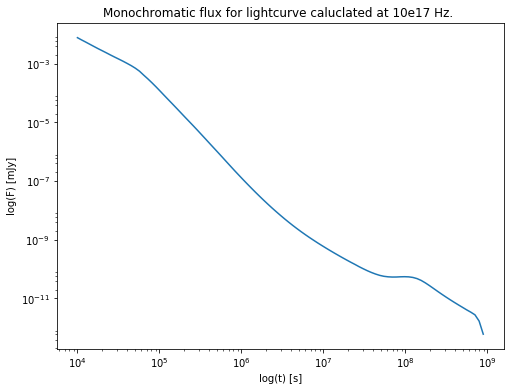

In [192]:
def test_plot(t, F):
    fig1 = plt.figure(figsize=(8,6))
    plt.plot(t, F)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('log(t) [s]')
    plt.ylabel('log(F) [mJy]')
    plt.title('Monochromatic flux for lightcurve caluclated at 10e17 Hz. ')
    plt.show()
    return fig1

fig1 = test_plot(t,F)

Figure 1: Reproduced the lightcurve found in Fig.2.1 from the BOXFITv2 User Guide (Eerten, 2016). Light curve was calculated at 10e17 Hz, and has a jetbreak at around 5x10e4 s. According to Eerten, the late bump is from the counter jet and the steep drop corresponds to observer times at witch the flux was automatically set to zero, as those times were no longer "fully covered by the simulation".    